In [30]:
import itertools
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from scipy import stats

LABEL_ALIAS = {
    'lit': 'In literature?',
    'ge': 'Germanosilicate composition?',
    'zeo': 'Zeolite composition?',
    'zty': 'Zeotype composition?',
}

df = pd.read_csv('../data/binding.csv', index_col=0)

In [31]:
# idxmin = df.groupby(['Zeolite', 'InchiKey']).idxmin()
# df.iloc[0]["Competition (SiO2)"]

# pd.unique(df["Zeolite"])  # -> 209 zeolites...
# pd.unique(df["SMILES"])  # -> 1194 smiles


def construct_column_count_histogram(col: str, df: pd.DataFrame, n_bins=20):
    col_vals = pd.unique(df[col])
    histogram_by_count = {}
    for val in col_vals:
        count = len(df.loc[df[col] == val])
        histogram_by_count[count] = histogram_by_count.get(count, 0) + 1
    plt.hist(histogram_by_count, bins=n_bins)
    plt.ylabel("# unique " + col)
    plt.title("Histogram of " + col + " binned by calculated binding energies")
    plt.xlabel("# calculated binding energies")
    print(
        "total cells: ",
        sum([count * instances for count, instances in histogram_by_count.items()]),
    )

# construct_column_count_histogram("Zeolite", df)
# construct_column_count_histogram("Ligand formula", df)


total not na cells: 112426


<ipython-input-32-31de74e139b9>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('matrix.png',dpi=150, figsize=(8,6))
<ipython-input-32-31de74e139b9>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('reconstructed_matrix.png',dpi=150, figsize=(8,6))
<ipython-input-32-31de74e139b9>:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('difference.png',dpi=150, figsize=(8,6))


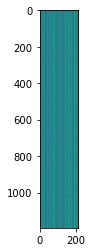

In [32]:
matrix = df.pivot(index="SMILES", columns="Zeolite", values="Binding (OSDA)")
print('total not na cells:', matrix.notna().sum().sum())  # 17587 what gives?

np_matrix = matrix.to_numpy()
np_matrix = np.nan_to_num(np_matrix)
U, s, V = np.linalg.svd(np_matrix)
var_explained = np.round(s ** 2 / np.sum(s ** 2), decimals=3)


def plot_top_k_singular_values(var_explained, top_k=70):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(range(top_k), var_explained[0:top_k])
    plt.xlabel("Singular Vector", fontsize=16)
    plt.ylabel("Proportion of Variance", fontsize=16)
    plt.tight_layout()
    plt.savefig("svd_scree_plot.png", dpi=150, figsize=(8, 6))
    plt.show()

num_components = 209
reconstructed_matrix = (
    np.matrix(U[:, :num_components])
    * np.diag(s[:num_components])
    * np.matrix(V[:num_components, :])
)

plt.imshow(np_matrix)
plt.savefig('matrix.png',dpi=150)

plt.imshow(reconstructed_matrix)
plt.savefig('reconstructed_matrix.png',dpi=150)

plt.imshow(np_matrix - reconstructed_matrix)
plt.savefig('difference.png',dpi=150)

In [37]:
from matrix_completion import svt_solve, calc_unobserved_rmse
import pdb
# which -a pip
# /opt/anaconda3/bin/pip install matrix-completion
# /opt/anaconda3/bin/pip install cvxpy

#okay let's try svt_solve first...

mask = np.isnan(np_matrix)
# pdb.set_trace()
print('mask: ', mask)
pdb.set_trace()
print('hello')

mask:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
--Return--
None
> <ipython-input-37-bcfdfebc4195>(12)<module>()
      9 mask = np.isnan(np_matrix)
     10 # pdb.set_trace()
     11 print('mask: ', mask)
---> 12 pdb.set_trace()
     13 print('hello')

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
hello
